# OPAM thermobarometer code 
### For Reykjanes Ridge and adjacent MOR segments

In [1]:
##Importing Pandas, numpy, matplotlib for later
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.express as px
from scipy.stats import chi2
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
global my_dtype,molwt,catnum,catwt

# preview of data set. For full view see associated csv files in folder and final csv file written by the end of script
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 400)

# import csv as dataframe(df) to manipulate in pd
df_all = pd.read_csv('ReykRidge.csv')

index = df_all.index
columns = df_all.columns
data = df_all.values
df_all.fillna(0, inplace=True)
df_all.set_index('Ex_row', inplace=True)

In [2]:
#check unfiltered dataframe
print (df_all.shape)

df_all

(1582, 37)


,Sample,Reference,Expedition ID,Latitude,Longitude,Lat.R,Long.R,Min elevation,Max elevation,Topo_bath,Axial/off,VR VT Ax,min age,age,max age,Method,Analysed,Composition,TS,SiO2,TiO2,Al2O3,Cr2O3,FeO,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,SrO,BaO,H2O,sum,Pressure_min,Probability
Ex_row,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ex_row1,*BA52-003-VG2320,"MELSON, 2003",nr,61.970,-26.590,62,-27,-805.0,-878.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,49.18,1.69,13.95,0.0,12.110000,0.00,0.00,7.26,12.33,2.00,0.15,0.08,0.0,0.0,0.0,0.00,0.0,0.0
Ex_row2,*BA52-005-001,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.82,1.59,14.21,0.0,12.850000,0.00,0.00,6.61,11.25,2.16,0.16,0.15,0.0,0.0,0.0,0.00,0.0,0.0
Ex_row3,*BA52-005-002-VG2201,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,49.85,1.54,14.07,0.0,12.240000,0.00,0.00,6.95,11.31,2.17,0.15,0.14,0.0,0.0,0.0,0.00,0.0,0.0
Ex_row4,*BA52-005-002-VG2202,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.87,1.52,14.38,0.0,12.380000,0.00,0.00,6.69,11.28,2.11,0.17,0.15,0.0,0.0,0.0,0.00,0.0,0.0
Ex_row5,*BA52-005-004,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.31,1.52,14.13,0.0,12.230000,0.00,0.00,7.26,11.25,2.14,0.16,0.18,0.0,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ex_row1697,181D2,"Jones et al., 2014",CD80,62.728,-25.285,63,-25,500.0,-500.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,48.44,2.40,12.04,0.0,16.296278,18.11,0.26,5.80,10.26,2.35,0.23,0.25,0.0,0.0,0.0,100.26,0.0,0.0
Ex_row1698,182D3,"Jones et al., 2014",CD80,62.804,-25.112,63,-25,300.0,-300.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,49.27,1.52,13.74,0.0,12.550410,13.95,0.21,7.55,11.31,2.07,0.15,0.17,0.0,0.0,0.0,99.86,0.0,0.0
Ex_row1699,183D2,"Jones et al., 2014",CD80,62.868,-25.055,63,-25,550.0,-550.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,49.26,1.51,14.33,0.0,12.365052,13.74,0.20,7.16,11.52,2.00,0.15,0.16,0.0,0.0,0.0,100.04,0.0,0.0


In [3]:
#filter out data with low MgO
df = df_all.drop(df_all[df_all.MgO<4.0].index)

print (df.shape)
df

(1581, 37)


,Sample,Reference,Expedition ID,Latitude,Longitude,Lat.R,Long.R,Min elevation,Max elevation,Topo_bath,Axial/off,VR VT Ax,min age,age,max age,Method,Analysed,Composition,TS,SiO2,TiO2,Al2O3,Cr2O3,FeO,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,SrO,BaO,H2O,sum,Pressure_min,Probability
Ex_row,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ex_row1,*BA52-003-VG2320,"MELSON, 2003",nr,61.970,-26.590,62,-27,-805.0,-878.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,49.18,1.69,13.95,0.0,12.110000,0.00,0.00,7.26,12.33,2.00,0.15,0.08,0.0,0.0,0.0,0.00,0.0,0.0
Ex_row2,*BA52-005-001,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.82,1.59,14.21,0.0,12.850000,0.00,0.00,6.61,11.25,2.16,0.16,0.15,0.0,0.0,0.0,0.00,0.0,0.0
Ex_row3,*BA52-005-002-VG2201,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,49.85,1.54,14.07,0.0,12.240000,0.00,0.00,6.95,11.31,2.17,0.15,0.14,0.0,0.0,0.0,0.00,0.0,0.0
Ex_row4,*BA52-005-002-VG2202,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.87,1.52,14.38,0.0,12.380000,0.00,0.00,6.69,11.28,2.11,0.17,0.15,0.0,0.0,0.0,0.00,0.0,0.0
Ex_row5,*BA52-005-004,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.31,1.52,14.13,0.0,12.230000,0.00,0.00,7.26,11.25,2.14,0.16,0.18,0.0,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ex_row1697,181D2,"Jones et al., 2014",CD80,62.728,-25.285,63,-25,500.0,-500.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,48.44,2.40,12.04,0.0,16.296278,18.11,0.26,5.80,10.26,2.35,0.23,0.25,0.0,0.0,0.0,100.26,0.0,0.0
Ex_row1698,182D3,"Jones et al., 2014",CD80,62.804,-25.112,63,-25,300.0,-300.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,49.27,1.52,13.74,0.0,12.550410,13.95,0.21,7.55,11.31,2.07,0.15,0.17,0.0,0.0,0.0,99.86,0.0,0.0
Ex_row1699,183D2,"Jones et al., 2014",CD80,62.868,-25.055,63,-25,550.0,-550.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,49.26,1.51,14.33,0.0,12.365052,13.74,0.20,7.16,11.52,2.00,0.15,0.16,0.0,0.0,0.0,100.04,0.0,0.0


In [4]:
# turn weight percent oxides into mole fractions
names=['SiO2', 'TiO2', 'Al2O3', 'FeO', 'MgO', 'MnO', 'CaO', 'Na2O', 'K2O', 'P2O5','Cr2O3','H2O']
formats=['<f8','<f8','<f8', '<f8', '<f8', '<f8', '<f8', '<f8', '<f8', '<f8', '<f8', '<f8']
my_dtype = dict(names=names, formats=formats)
molwt = np.array([(60.08,79.866,101.96,71.844,40.3044,70.9374,56.0774,61.9789,94.20,283.89,151.99,18.01528)],dtype=my_dtype)
catnum = np.array([(1.,1.,2.,1.,1.,1.,1.,2.,2.,2.,2.,2.)],dtype=my_dtype)
catwt = np.zeros_like(molwt) # mol weight of oxide with single cation in formula unit
for n in my_dtype['names']:
    catwt[n] = molwt[n]/catnum[n] # Beattie style single cation molar fracs

In [5]:
#convert wt% oxide to atomic % of cation
def wt2cat (majwt):
    # create empty dataframe of same shape
    catprop= df*0 
    for n in my_dtype['names']:
        #calc cation wt sum of each sample?
        catprop[n] = majwt[n]/catwt[n]
        
    catprop['molsum']= catprop.sum(axis=1)
    Msum = catprop['molsum'].to_numpy()
    
    catfrac = df*0
    for n in my_dtype['names']:
        catfrac[n] = catprop[n]/Msum 
    return catfrac

In [6]:
def xpred (p,xna,xk,xti,xfe,xsi):
    "calculate XAl,XCa,XMg for Yang model"
     
    xalp = 0.236 + 0.00218*p + 0.109*xna + 0.593*xk -0.350*xti -0.299*xfe - 0.130*xsi
    xcap = 1.133 - 0.00339*p -0.569*xna -0.776*xk-0.672*xti-0.214*xfe-3.355*xsi + 2.830*(xsi*xsi)
    xmgp = -0.277 + 0.00114*p -0.543*xna -0.947*xk -0.117*xti-0.490*xfe+2.086*xsi -2.400*(xsi*xsi) # original from table   
 
    return(xalp,xcap,xmgp)

In [7]:
def cc (pkbar,xna,xk,xti,xfe,xsi,xalo,xcao,xmgo,xals,xcas,xmgs):
    "chi2 function to minimise"
    xalp,xcap,xmgp = xpred(pkbar,xna,xk,xti,xfe,xsi)    
    cc =((xalo-xalp)/xals)**2. + ((xcao-xcap)/xcas)**2. + ((xmgo-xmgp)/xmgs)**2.
 
    return(cc)

In [8]:
# Yang et al., 1996 model - Not Voight et al., 2017
majwt = df.copy()
xobs = wt2cat(majwt)    
xalo,xcao,xmgo = xobs['Al2O3'],xobs['CaO'],xobs['MgO']
# 5% precision on major elements in glasses - 1 sig - estimate from NEAVE et al., 2015
xals,xcas,xmgs = 0.05*xalo,0.05*xcao,0.05*xmgo
xna,xk,xti,xfe,xsi = xobs['Na2O'],xobs['K2O'],xobs['TiO2'],xobs['FeO'],xobs['SiO2']
pkbar = 3.0
cctest = cc(pkbar,xna,xk,xti,xfe,xsi,xalo,xcao,xmgo,xals,xcas,xmgs)

ppmin = [] 
pprob = []

for q in range(len(xsi)):
    res = minimize_scalar(cc, method= 'brent', args = (xna[q],xk[q],xti[q],xfe[q],xsi[q],xalo[q],xcao[q],xmgo[q],xals[q],xcas[q],xmgs[q]))
    pmin = res.x
    cpmin = res.fun
    prob = 1- chi2.cdf(cpmin,2) # signifance value
    ppmin.append(pmin)
    pprob.append(prob)
       
df.loc[:,('Pressure_min')] = ppmin    
df.loc[:,('Probability')] = pprob 

#check columns append to datafame
df

C:\Users\Rachael\AppData\Local\Temp\ipykernel_30464\3406454581.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  catprop['molsum']= catprop.sum(axis=1)


,Sample,Reference,Expedition ID,Latitude,Longitude,Lat.R,Long.R,Min elevation,Max elevation,Topo_bath,Axial/off,VR VT Ax,min age,age,max age,Method,Analysed,Composition,TS,SiO2,TiO2,Al2O3,Cr2O3,FeO,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,SrO,BaO,H2O,sum,Pressure_min,Probability
Ex_row,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ex_row1,*BA52-003-VG2320,"MELSON, 2003",nr,61.970,-26.590,62,-27,-805.0,-878.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,49.18,1.69,13.95,0.0,12.110000,0.00,0.00,7.26,12.33,2.00,0.15,0.08,0.0,0.0,0.0,0.00,2.001353,0.726663
Ex_row2,*BA52-005-001,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.82,1.59,14.21,0.0,12.850000,0.00,0.00,6.61,11.25,2.16,0.16,0.15,0.0,0.0,0.0,0.00,2.126705,0.214739
Ex_row3,*BA52-005-002-VG2201,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,49.85,1.54,14.07,0.0,12.240000,0.00,0.00,6.95,11.31,2.17,0.15,0.14,0.0,0.0,0.0,0.00,2.751015,0.577009
Ex_row4,*BA52-005-002-VG2202,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.87,1.52,14.38,0.0,12.380000,0.00,0.00,6.69,11.28,2.11,0.17,0.15,0.0,0.0,0.0,0.00,2.205781,0.156237
Ex_row5,*BA52-005-004,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.31,1.52,14.13,0.0,12.230000,0.00,0.00,7.26,11.25,2.14,0.16,0.18,0.0,0.0,0.0,0.00,3.414164,0.859679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ex_row1697,181D2,"Jones et al., 2014",CD80,62.728,-25.285,63,-25,500.0,-500.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,48.44,2.40,12.04,0.0,16.296278,18.11,0.26,5.80,10.26,2.35,0.23,0.25,0.0,0.0,0.0,100.26,2.006862,0.815923
Ex_row1698,182D3,"Jones et al., 2014",CD80,62.804,-25.112,63,-25,300.0,-300.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,49.27,1.52,13.74,0.0,12.550410,13.95,0.21,7.55,11.31,2.07,0.15,0.17,0.0,0.0,0.0,99.86,4.253741,0.924944
Ex_row1699,183D2,"Jones et al., 2014",CD80,62.868,-25.055,63,-25,550.0,-550.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,49.26,1.51,14.33,0.0,12.365052,13.74,0.20,7.16,11.52,2.00,0.15,0.16,0.0,0.0,0.0,100.04,3.872075,0.506180


If having issues with working on CSV file (error for majwt) check for special characters in the csv file and for gaps in the data (i.e. if some samples only have a couple of majwt but not all the ones needed, then the function cannot process.


# **Filtered data ( P > 0.80)**

In [9]:
#filter out data with low probability (>0.80)
df_Thn = df['Probability']>0.80
df_prob = df[df_Thn]
df_f = df_prob.copy()

#check dataframe
print (df_f.shape)
df_f

(692, 37)


,Sample,Reference,Expedition ID,Latitude,Longitude,Lat.R,Long.R,Min elevation,Max elevation,Topo_bath,Axial/off,VR VT Ax,min age,age,max age,Method,Analysed,Composition,TS,SiO2,TiO2,Al2O3,Cr2O3,FeO,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,SrO,BaO,H2O,sum,Pressure_min,Probability
Ex_row,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ex_row5,*BA52-005-004,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.31,1.52,14.13,0.0,12.230000,0.00,0.00,7.26,11.25,2.14,0.16,0.18,0.0,0.0,0.0,0.00,3.414164,0.859679
Ex_row13,*BA52-005-012,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,51.00,1.56,13.86,0.0,12.390000,0.00,0.00,7.11,11.43,2.18,0.21,0.12,0.0,0.0,0.0,0.00,2.097038,0.918312
Ex_row19,*BA52-005-018,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.44,1.45,13.88,0.0,12.410000,0.00,0.00,7.16,11.39,2.12,0.19,0.15,0.0,0.0,0.0,0.00,2.661042,0.919529
Ex_row67,*BA52-005-064,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.65,1.55,14.21,0.0,12.550000,0.00,0.00,7.47,11.36,2.04,0.16,0.10,0.0,0.0,0.0,0.00,3.855037,0.931936
Ex_row76,*BA52-006-003-VG2267,"MELSON, 2003",nr,59.770,-29.800,60,-30,-997.0,-997.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,51.37,1.24,13.65,0.0,12.570000,0.00,0.00,7.05,11.87,2.14,0.07,0.11,0.0,0.0,0.0,0.00,1.155965,0.846176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ex_row1696,180D2,"Jones et al., 2014",CD80,62.727,-25.170,63,-25,500.0,-500.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,49.11,1.63,14.03,0.0,12.769062,14.19,0.21,7.30,11.00,2.07,0.21,0.19,0.0,0.0,0.0,99.91,4.818415,0.983579
Ex_row1697,181D2,"Jones et al., 2014",CD80,62.728,-25.285,63,-25,500.0,-500.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,48.44,2.40,12.04,0.0,16.296278,18.11,0.26,5.80,10.26,2.35,0.23,0.25,0.0,0.0,0.0,100.26,2.006862,0.815923
Ex_row1698,182D3,"Jones et al., 2014",CD80,62.804,-25.112,63,-25,300.0,-300.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,49.27,1.52,13.74,0.0,12.550410,13.95,0.21,7.55,11.31,2.07,0.15,0.17,0.0,0.0,0.0,99.86,4.253741,0.924944


In [10]:
#Fe filter
df_Fe = df_f.drop(df_f[df_f.FeO<7.9].index)
print (df_Fe.shape)

#Ca filter
df_FeCa = df_Fe.drop(df_Fe[df_Fe.CaO<8.6].index)
print (df_FeCa.shape)

#Al filter
df_FeCaAl = df_FeCa.drop(df_FeCa[df_FeCa.Al2O3<11.15].index)
print (df_FeCaAl.shape)
df_up = df_FeCaAl
df_up

(690, 37)
(690, 37)
(690, 37)


,Sample,Reference,Expedition ID,Latitude,Longitude,Lat.R,Long.R,Min elevation,Max elevation,Topo_bath,Axial/off,VR VT Ax,min age,age,max age,Method,Analysed,Composition,TS,SiO2,TiO2,Al2O3,Cr2O3,FeO,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,SrO,BaO,H2O,sum,Pressure_min,Probability
Ex_row,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ex_row5,*BA52-005-004,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.31,1.52,14.13,0.0,12.230000,0.00,0.00,7.26,11.25,2.14,0.16,0.18,0.0,0.0,0.0,0.00,3.414164,0.859679
Ex_row13,*BA52-005-012,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,51.00,1.56,13.86,0.0,12.390000,0.00,0.00,7.11,11.43,2.18,0.21,0.12,0.0,0.0,0.0,0.00,2.097038,0.918312
Ex_row19,*BA52-005-018,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.44,1.45,13.88,0.0,12.410000,0.00,0.00,7.16,11.39,2.12,0.19,0.15,0.0,0.0,0.0,0.00,2.661042,0.919529
Ex_row67,*BA52-005-064,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.65,1.55,14.21,0.0,12.550000,0.00,0.00,7.47,11.36,2.04,0.16,0.10,0.0,0.0,0.0,0.00,3.855037,0.931936
Ex_row76,*BA52-006-003-VG2267,"MELSON, 2003",nr,59.770,-29.800,60,-30,-997.0,-997.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,51.37,1.24,13.65,0.0,12.570000,0.00,0.00,7.05,11.87,2.14,0.07,0.11,0.0,0.0,0.0,0.00,1.155965,0.846176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ex_row1696,180D2,"Jones et al., 2014",CD80,62.727,-25.170,63,-25,500.0,-500.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,49.11,1.63,14.03,0.0,12.769062,14.19,0.21,7.30,11.00,2.07,0.21,0.19,0.0,0.0,0.0,99.91,4.818415,0.983579
Ex_row1697,181D2,"Jones et al., 2014",CD80,62.728,-25.285,63,-25,500.0,-500.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,48.44,2.40,12.04,0.0,16.296278,18.11,0.26,5.80,10.26,2.35,0.23,0.25,0.0,0.0,0.0,100.26,2.006862,0.815923
Ex_row1698,182D3,"Jones et al., 2014",CD80,62.804,-25.112,63,-25,300.0,-300.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,49.27,1.52,13.74,0.0,12.550410,13.95,0.21,7.55,11.31,2.07,0.15,0.17,0.0,0.0,0.0,99.86,4.253741,0.924944


# Calculating the T from equation from Yang et al., 1996

In [11]:
#convert wt% oxide to atomic % of cation
def wt2cat2 (majwt):
    # create empty dataframe of same shape
    catprop= df_up*0 
    for n in my_dtype['names']:
        #calc cation wt sum of each sample?
        catprop[n] = majwt[n]/catwt[n]
        
    catprop['molsum']= catprop.sum(axis=1)
    Msum = catprop['molsum'].to_numpy()
    
    catfrac = df_up*0
    for n in my_dtype['names']:
        catfrac[n] = catprop[n]/Msum 
    return catfrac

In [12]:
# Yang et al., 1996 model
m = df_up[['SiO2', 'TiO2', 'Al2O3', 'FeO', 'MgO', 'MnO', 'CaO', 'Na2O', 'K2O', 'P2O5','Cr2O3','H2O']].copy()
xobs = wt2cat2(m)    
xna,xk,xti,xfe,xsi = xobs['Na2O'],xobs['K2O'],xobs['TiO2'],xobs['FeO'],xobs['SiO2']
xsi2 = xobs['SiO2']*xobs['SiO2']
xsi_xti =  xobs['SiO2']* xobs['TiO2']

P = df_up.Pressure_min
df_up.loc[:,('OPAM_T')] = 581.7 + 5.858*P - 691.0*xna - 848.9*xk + 11492*xti - 574.3*xfe + 3114*xsi - 3529*(xsi2) - 25679*(xsi_xti)
df_up

C:\Users\Rachael\AppData\Local\Temp\ipykernel_30464\1891452029.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  catprop['molsum']= catprop.sum(axis=1)


,Sample,Reference,Expedition ID,Latitude,Longitude,Lat.R,Long.R,Min elevation,Max elevation,Topo_bath,Axial/off,VR VT Ax,min age,age,max age,Method,Analysed,Composition,TS,SiO2,TiO2,Al2O3,Cr2O3,FeO,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,SrO,BaO,H2O,sum,Pressure_min,Probability,OPAM_T
Ex_row,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ex_row5,*BA52-005-004,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.31,1.52,14.13,0.0,12.230000,0.00,0.00,7.26,11.25,2.14,0.16,0.18,0.0,0.0,0.0,0.00,3.414164,0.859679,1191.950249
Ex_row13,*BA52-005-012,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,51.00,1.56,13.86,0.0,12.390000,0.00,0.00,7.11,11.43,2.18,0.21,0.12,0.0,0.0,0.0,0.00,2.097038,0.918312,1180.809332
Ex_row19,*BA52-005-018,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.44,1.45,13.88,0.0,12.410000,0.00,0.00,7.16,11.39,2.12,0.19,0.15,0.0,0.0,0.0,0.00,2.661042,0.919529,1186.141221
Ex_row67,*BA52-005-064,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.65,1.55,14.21,0.0,12.550000,0.00,0.00,7.47,11.36,2.04,0.16,0.10,0.0,0.0,0.0,0.00,3.855037,0.931936,1195.497015
Ex_row76,*BA52-006-003-VG2267,"MELSON, 2003",nr,59.770,-29.800,60,-30,-997.0,-997.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,51.37,1.24,13.65,0.0,12.570000,0.00,0.00,7.05,11.87,2.14,0.07,0.11,0.0,0.0,0.0,0.00,1.155965,0.846176,1177.018770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ex_row1696,180D2,"Jones et al., 2014",CD80,62.727,-25.170,63,-25,500.0,-500.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,49.11,1.63,14.03,0.0,12.769062,14.19,0.21,7.30,11.00,2.07,0.21,0.19,0.0,0.0,0.0,99.91,4.818415,0.983579,1200.605975
Ex_row1697,181D2,"Jones et al., 2014",CD80,62.728,-25.285,63,-25,500.0,-500.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,48.44,2.40,12.04,0.0,16.296278,18.11,0.26,5.80,10.26,2.35,0.23,0.25,0.0,0.0,0.0,100.26,2.006862,0.815923,1157.688288
Ex_row1698,182D3,"Jones et al., 2014",CD80,62.804,-25.112,63,-25,300.0,-300.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,49.27,1.52,13.74,0.0,12.550410,13.95,0.21,7.55,11.31,2.07,0.15,0.17,0.0,0.0,0.0,99.86,4.253741,0.924944,1199.142743


# Pressure to depth calcuation


In [13]:
import pandas as pd

rhoU = 3000 #density of oceanic crust kg/m3
rhoL = 3300 #density of residual mantle kg/m3
''' Weller, O. M., Copley, A., Miller, W. G. R., Palin, R. M., & Dyck, B. (2019). 
The relationship between mantle potential temperature and oceanic lithosphere buoyancy. 
Earth and Planetary Science Letters, 518, 86-99..'''

g = 9.8 #gravity in m/s2
Ptr = 235200000 #Pressure in Pa = to 8 km depth with crustal density of 3000 kg/m3

cov = 1000*100000
P = cov*df_up.Pressure_min
df_up.append(P)

df_up.loc[:,('Pressure(Pa)')] = P
depth = []

for P in df_up["Pressure(Pa)"]:
    Ptr = 235200000
    D = P/(rhoU*g)
    if P <= Ptr:
        Z = D
    else:
        Z = (Ptr/(rhoU*g)) +((P-Ptr)/(rhoL*g))
    Dep = Z/1000
    depth.append(Dep)
df_up.loc[:,('Depth_km')] = depth
df_up

C:\Users\Rachael\AppData\Local\Temp\ipykernel_30464\4037540864.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_up.append(P)


,Sample,Reference,Expedition ID,Latitude,Longitude,Lat.R,Long.R,Min elevation,Max elevation,Topo_bath,Axial/off,VR VT Ax,min age,age,max age,Method,Analysed,Composition,TS,SiO2,TiO2,Al2O3,Cr2O3,FeO,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,SrO,BaO,H2O,sum,Pressure_min,Probability,OPAM_T,Pressure(Pa),Depth_km
Ex_row,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ex_row5,*BA52-005-004,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.31,1.52,14.13,0.0,12.230000,0.00,0.00,7.26,11.25,2.14,0.16,0.18,0.0,0.0,0.0,0.00,3.414164,0.859679,1191.950249,3.414164e+08,11.284368
Ex_row13,*BA52-005-012,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,51.00,1.56,13.86,0.0,12.390000,0.00,0.00,7.11,11.43,2.18,0.21,0.12,0.0,0.0,0.0,0.00,2.097038,0.918312,1180.809332,2.097038e+08,7.132782
Ex_row19,*BA52-005-018,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.44,1.45,13.88,0.0,12.410000,0.00,0.00,7.16,11.39,2.12,0.19,0.15,0.0,0.0,0.0,0.00,2.661042,0.919529,1186.141221,2.661042e+08,8.955603
Ex_row67,*BA52-005-064,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.65,1.55,14.21,0.0,12.550000,0.00,0.00,7.47,11.36,2.04,0.16,0.10,0.0,0.0,0.0,0.00,3.855037,0.931936,1195.497015,3.855037e+08,12.647610
Ex_row76,*BA52-006-003-VG2267,"MELSON, 2003",nr,59.770,-29.800,60,-30,-997.0,-997.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,51.37,1.24,13.65,0.0,12.570000,0.00,0.00,7.05,11.87,2.14,0.07,0.11,0.0,0.0,0.0,0.00,1.155965,0.846176,1177.018770,1.155965e+08,3.931854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ex_row1696,180D2,"Jones et al., 2014",CD80,62.727,-25.170,63,-25,500.0,-500.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,49.11,1.63,14.03,0.0,12.769062,14.19,0.21,7.30,11.00,2.07,0.21,0.19,0.0,0.0,0.0,99.91,4.818415,0.983579,1200.605975,4.818415e+08,15.626515
Ex_row1697,181D2,"Jones et al., 2014",CD80,62.728,-25.285,63,-25,500.0,-500.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,48.44,2.40,12.04,0.0,16.296278,18.11,0.26,5.80,10.26,2.35,0.23,0.25,0.0,0.0,0.0,100.26,2.006862,0.815923,1157.688288,2.006862e+08,6.826061
Ex_row1698,182D3,"Jones et al., 2014",CD80,62.804,-25.112,63,-25,300.0,-300.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,49.27,1.52,13.74,0.0,12.550410,13.95,0.21,7.55,11.31,2.07,0.15,0.17,0.0,0.0,0.0,99.86,4.253741,0.924944,1199.142743,4.253741e+08,13.880461


In [14]:
Nm = df_up.Depth_km*(-1000)
df_up.loc[:,('Depth_m')] = Nm
df_up

,Sample,Reference,Expedition ID,Latitude,Longitude,Lat.R,Long.R,Min elevation,Max elevation,Topo_bath,Axial/off,VR VT Ax,min age,age,max age,Method,Analysed,Composition,TS,SiO2,TiO2,Al2O3,Cr2O3,FeO,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,SrO,BaO,H2O,sum,Pressure_min,Probability,OPAM_T,Pressure(Pa),Depth_km,Depth_m
Ex_row,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ex_row5,*BA52-005-004,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.31,1.52,14.13,0.0,12.230000,0.00,0.00,7.26,11.25,2.14,0.16,0.18,0.0,0.0,0.0,0.00,3.414164,0.859679,1191.950249,3.414164e+08,11.284368,-11284.367571
Ex_row13,*BA52-005-012,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,51.00,1.56,13.86,0.0,12.390000,0.00,0.00,7.11,11.43,2.18,0.21,0.12,0.0,0.0,0.0,0.00,2.097038,0.918312,1180.809332,2.097038e+08,7.132782,-7132.782335
Ex_row19,*BA52-005-018,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.44,1.45,13.88,0.0,12.410000,0.00,0.00,7.16,11.39,2.12,0.19,0.15,0.0,0.0,0.0,0.00,2.661042,0.919529,1186.141221,2.661042e+08,8.955603,-8955.603040
Ex_row67,*BA52-005-064,"MELSON, 2003",nr,61.990,-26.590,62,-27,-658.0,-658.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,50.65,1.55,14.21,0.0,12.550000,0.00,0.00,7.47,11.36,2.04,0.16,0.10,0.0,0.0,0.0,0.00,3.855037,0.931936,1195.497015,3.855037e+08,12.647610,-12647.610125
Ex_row76,*BA52-006-003-VG2267,"MELSON, 2003",nr,59.770,-29.800,60,-30,-997.0,-997.0,0.0,axial,0,0.0,0.0,0.0,EMP,GLASS,BASALT,1.0,51.37,1.24,13.65,0.0,12.570000,0.00,0.00,7.05,11.87,2.14,0.07,0.11,0.0,0.0,0.0,0.00,1.155965,0.846176,1177.018770,1.155965e+08,3.931854,-3931.853988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ex_row1696,180D2,"Jones et al., 2014",CD80,62.727,-25.170,63,-25,500.0,-500.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,49.11,1.63,14.03,0.0,12.769062,14.19,0.21,7.30,11.00,2.07,0.21,0.19,0.0,0.0,0.0,99.91,4.818415,0.983579,1200.605975,4.818415e+08,15.626515,-15626.515017
Ex_row1697,181D2,"Jones et al., 2014",CD80,62.728,-25.285,63,-25,500.0,-500.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,48.44,2.40,12.04,0.0,16.296278,18.11,0.26,5.80,10.26,2.35,0.23,0.25,0.0,0.0,0.0,100.26,2.006862,0.815923,1157.688288,2.006862e+08,6.826061,-6826.061462
Ex_row1698,182D3,"Jones et al., 2014",CD80,62.804,-25.112,63,-25,300.0,-300.0,0.0,axial,axial,0.0,0.0,0.0,0,WHOLE ROCK,0,0.0,49.27,1.52,13.74,0.0,12.550410,13.95,0.21,7.55,11.31,2.07,0.15,0.17,0.0,0.0,0.0,99.86,4.253741,0.924944,1199.142743,4.253741e+08,13.880461,-13880.461451


C:\Users\Rachael\AppData\Local\Temp\ipykernel_30464\1877807078.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(ssm)


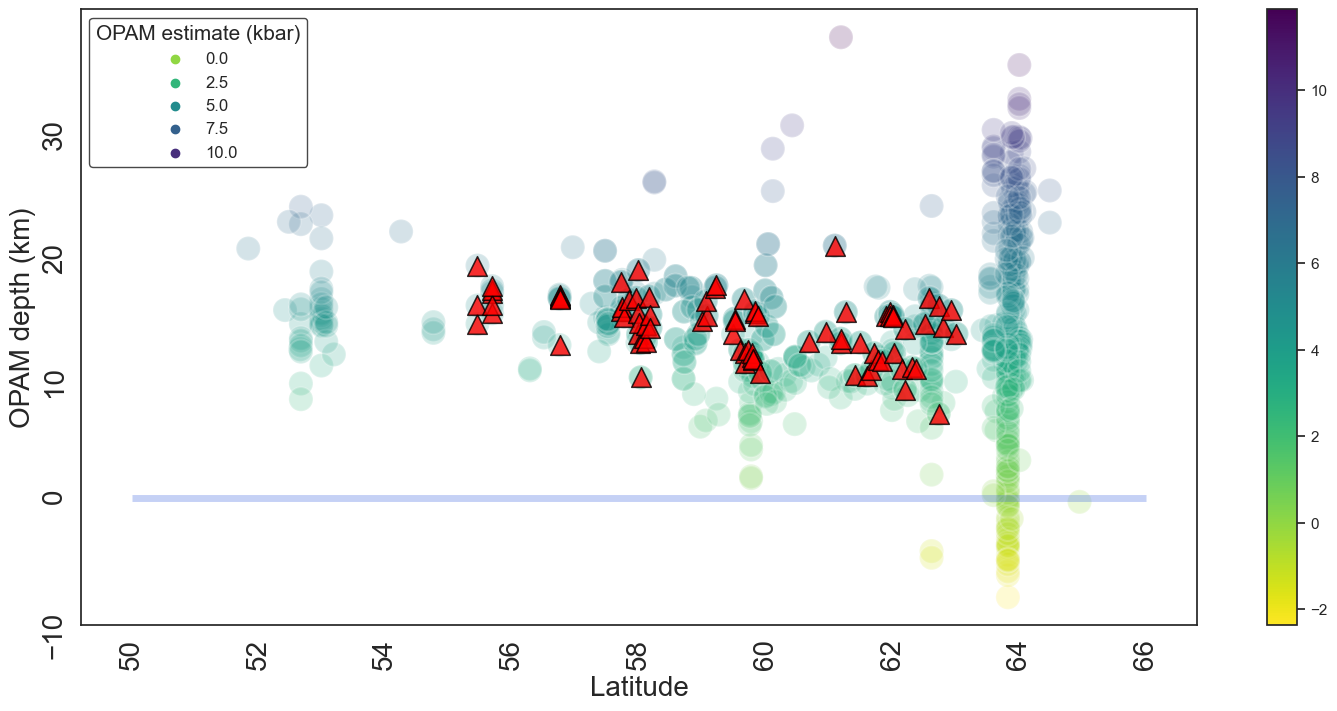

In [15]:
sns.set(rc={'figure.figsize':(18,8)})
sns.set_style("white")
axial = df_up.loc[df_up['VR VT Ax']=="axial"]

#all filtered samples for Reykjanes Ridge data set
ax = sns.scatterplot(x="Latitude", 
                     y="Depth_km",
                     data = df_up,
                     color = "lightskyblue",
                     palette = 'viridis_r',
                     hue = 'Pressure_min',
                     alpha = 0.2,
                     #edgecolor = "black",
                     marker = "o",
                     s = 300
                     
)

n = plt.Normalize(df_up['Pressure_min'].min(), df_up['Pressure_min'].max())
ssm = plt.cm.ScalarMappable(cmap="viridis_r", norm=n)
ssm.set_array([])
ax.get_legend().remove()
ax.figure.colorbar(ssm)

#axial samples only
ax = sns.scatterplot(x="Latitude", 
                     y="Depth_km",
                     data = axial,
                     color = "red",
                     alpha = 0.8,
                     edgecolor = "black",
                     marker = "^",
                     s = 200
)
plt.hlines( y = 0, color='royalblue', linewidth=5, alpha=.3, xmin = 50, xmax = 66) 
plt.xticks(rotation=90)
plt.yticks(rotation=90)

ax.set_xlabel("Latitude",fontsize=20)
#ax.legend(loc='center left', bbox_to_anchor=(1.5, 0.5), ncol=1)
ax.set_ylabel("OPAM depth (km)",fontsize=20)
ax.tick_params(labelsize=20)
ax.legend(title = "OPAM estimate (kbar)", title_fontsize = 15, fontsize = 12, edgecolor = 'k', ncol=1)

ax.set(xticks=[50,52,54,56,58,60,62,64,66])
#plt.savefig("opam vs Latitude in groups", bbox_inches='tight', transparent = True, dpi = 500)
plt.show()

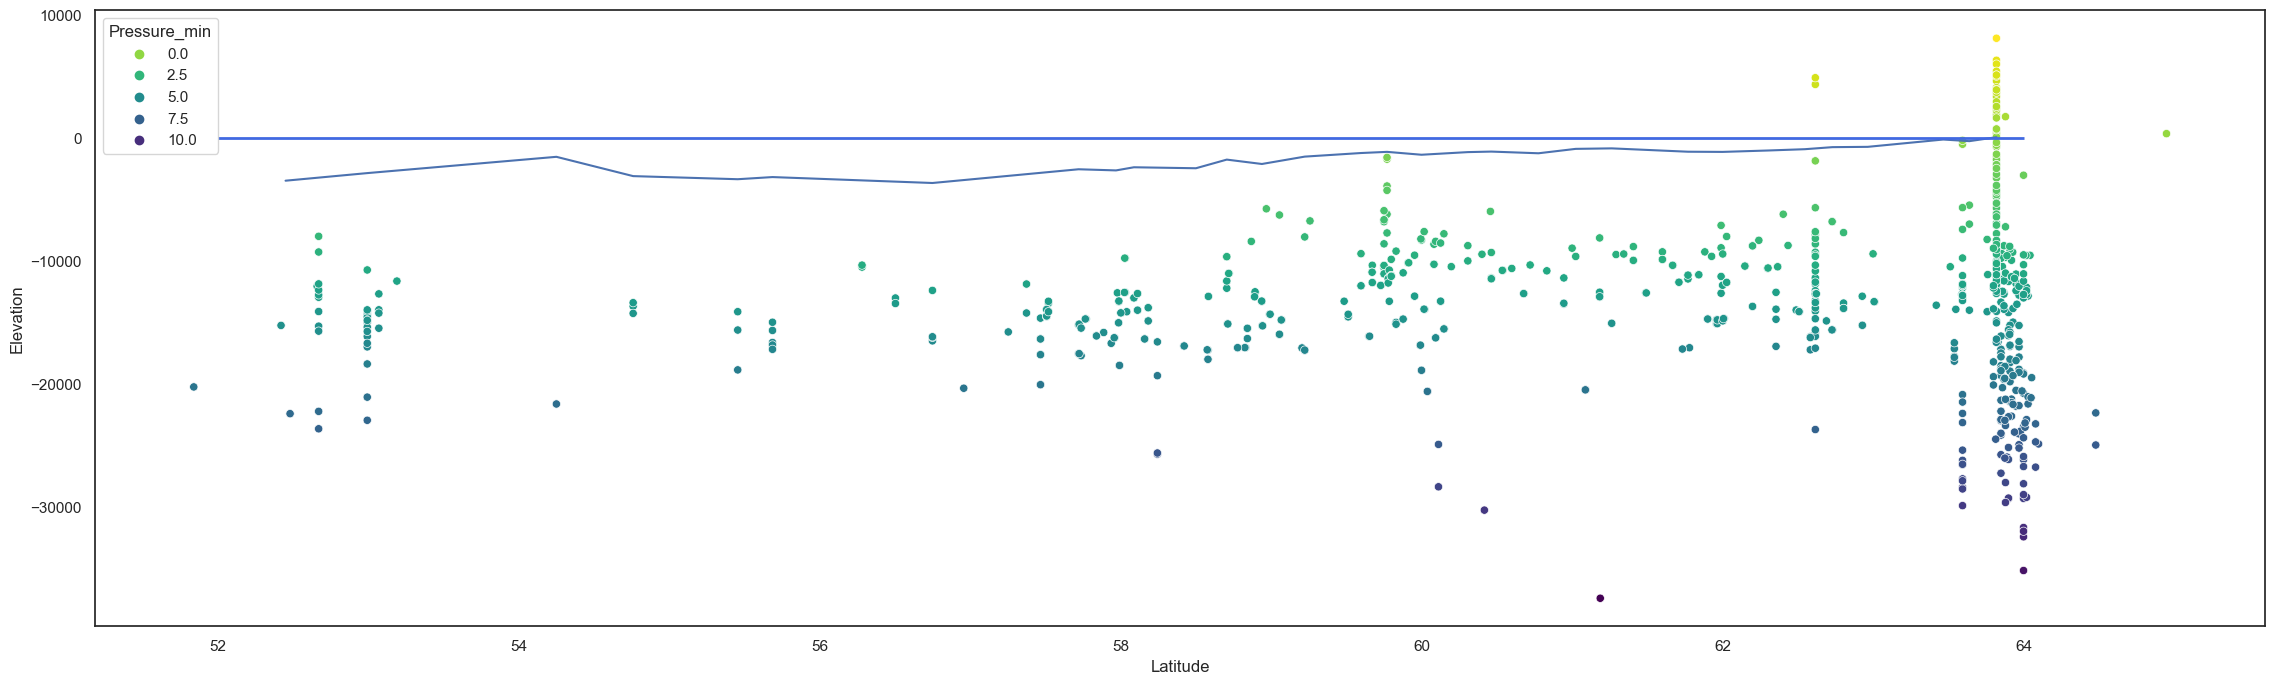

In [16]:
bth = pd.read_csv('bathyRR.csv', encoding= 'unicode_escape')

sns.set(rc={'figure.figsize':(28,8)})
sns.set_style("white")

ax = sns.lineplot(data=bth,
                  x="Latitude", 
                  y=bth.Elevation*1.5
)
plt.hlines( y = 0, color='royalblue', linewidth=2, xmin = 52, xmax = 64) 

ax = sns.scatterplot(x="Latitude", 
                     y="Depth_m",
                     data = df_up,
                     color = "lightskyblue",
                     palette = 'viridis_r',
                     hue = "Pressure_min",
                     #edgecolor = "black",
                     marker = "o",
                     
                     
)
ax.set(xticks=[52,54,56,58,60,62,64])
#plt.savefig("opam vs Latitude in groups", bbox_inches='tight', transparent = True, dpi = 500)
plt.show()

# Magma flux calcuation
## Comparison of magma flux to OPAM pressures

In [17]:
##Importing Pandas, numpy, matplotlib for later
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.express as px

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 400)

bm = pd.read_csv('RR_50_v2.csv', encoding= 'unicode_escape')

index = bm.index
columns = bm.columns
data = bm.values
bm.fillna(0, inplace=True)
bm

,ï»¿,Longitude,Latitude,Site context,Temperature,Pressure_min,Pressure,Full spreading rate,km/yr (full),half spreading rate,km/yr (half),crustal_thickness,reference,blockmedian length km,blockmedian width km,blockmedian area km2,full Spreading rate (km/yr),MQ,Unnamed: 18,Unnamed: 19
0,ex_row_2,-22.72000,63.8200,RVZ (Reykjanes-Svartsengi),1175.858986,1.969794,1.969794,18.8,0.000019,9.40,0.000009,15.00,Weir 2001 line A,45,13,585,0.000019,0.000019,0.0,0.0
1,ex_row_3,-23.81500,63.4665,Reykjanes Ridge,1183.435508,3.664357,3.664357,18.9,0.000019,9.45,0.000009,14.00,"Weir et al., 2001",50,15,750,0.000019,0.000018,0.0,0.0
2,ex_row_4,-23.41000,63.6400,Reykjanes Ridge,1191.741430,3.364928,3.364928,18.9,0.000019,9.45,0.000009,14.20,"Weir et al., 2001",50,15,750,0.000019,0.000018,0.0,0.0
3,ex_row_5,-24.78700,62.9645,Reykjanes Ridge,1196.309661,4.078536,4.078536,19.1,0.000019,9.55,0.000010,11.50,"Weir et al., 2001",50,15,750,0.000019,0.000015,0.0,0.0
4,ex_row_6,-25.50000,62.5465,Reykjanes Ridge,1198.344179,4.339035,4.339035,19.2,0.000019,9.60,0.000010,11.05,"Weir et al., 2001",50,15,750,0.000019,0.000014,0.0,0.0
5,ex_row_7,-25.17000,62.7300,Reykjanes Ridge,1199.144452,4.253741,4.253741,19.2,0.000019,9.60,0.000010,11.20,"Weir et al., 2001",50,15,750,0.000019,0.000014,0.0,0.0
6,ex_row_8,-26.50000,62.0000,Reykjanes Ridge,1197.219959,3.855037,3.855037,19.3,0.000019,9.65,0.000010,10.26,"Jones et al., 2014",50,15,750,0.000019,0.000013,0.0,0.0
7,ex_row_9,-25.92100,62.3010,Reykjanes Ridge,1194.641891,3.175579,3.175579,19.2,0.000019,9.60,0.000010,10.75,"Jones et al., 2014",50,15,750,0.000019,0.000014,0.0,0.0
8,ex_row_10,-26.86000,61.7700,Reykjanes Ridge,1191.506295,3.374625,3.374625,19.4,0.000019,9.70,0.000010,10.60,"Jones et al., 2014",50,15,750,0.000019,0.000014,0.0,0.0
9,ex_row_11,-27.60000,61.2630,Reykjanes Ridge,1201.136532,3.836517,3.836517,19.5,0.000019,9.75,0.000010,9.71,"Jones et al., 2014",50,15,750,0.000019,0.000013,0.0,0.0


In [18]:
import pandas as pd

rhoU = 3000 #density of oceanic crust kg/m3
rhoL = 3300 #density of residual mantle kg/m3
''' Weller, O. M., Copley, A., Miller, W. G. R., Palin, R. M., & Dyck, B. (2019). 
The relationship between mantle potential temperature and oceanic lithosphere buoyancy. 
Earth and Planetary Science Letters, 518, 86-99..'''

g = 9.8 #gravity in m/s2
Ptr = 235200000 #Pressure in Pa = to 8 km depth with crustal density of 3000 kg/m3

cov = 1000*100000
P = cov*bm.Pressure
bm.append(P)


bm.loc[:,('Pressure')] = P


depth = []

for P in bm["Pressure"]:
    Ptr = 235200000
    D = P/(rhoU*g)
    if P <= Ptr:
        Z = D
    else:
        Z = (Ptr/(rhoU*g)) +((P-Ptr)/(rhoL*g))
    Dep = Z/1000
    depth.append(Dep)
bm.loc[:,('Depth_km')] = depth

Nm = bm.Depth_km*(-1000)
bm.loc[:,('Depth_m')] = Nm
bm



C:\Users\Rachael\AppData\Local\Temp\ipykernel_30464\197803939.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bm.append(P)


,ï»¿,Longitude,Latitude,Site context,Temperature,Pressure_min,Pressure,Full spreading rate,km/yr (full),half spreading rate,km/yr (half),crustal_thickness,reference,blockmedian length km,blockmedian width km,blockmedian area km2,full Spreading rate (km/yr),MQ,Unnamed: 18,Unnamed: 19,Depth_km,Depth_m
0,ex_row_2,-22.72000,63.8200,RVZ (Reykjanes-Svartsengi),1175.858986,1.969794,196979399.9,18.8,0.000019,9.40,0.000009,15.00,Weir 2001 line A,45,13,585,0.000019,0.000019,0.0,0.0,6.699980,-6699.979588
1,ex_row_3,-23.81500,63.4665,Reykjanes Ridge,1183.435508,3.664357,366435701.6,18.9,0.000019,9.45,0.000009,14.00,"Weir et al., 2001",50,15,750,0.000019,0.000018,0.0,0.0,12.057999,-12057.999431
2,ex_row_4,-23.41000,63.6400,Reykjanes Ridge,1191.741430,3.364928,336492810.1,18.9,0.000019,9.45,0.000009,14.20,"Weir et al., 2001",50,15,750,0.000019,0.000018,0.0,0.0,11.132122,-11132.121524
3,ex_row_5,-24.78700,62.9645,Reykjanes Ridge,1196.309661,4.078536,407853559.9,19.1,0.000019,9.55,0.000010,11.50,"Weir et al., 2001",50,15,750,0.000019,0.000015,0.0,0.0,13.338700,-13338.700059
4,ex_row_6,-25.50000,62.5465,Reykjanes Ridge,1198.344179,4.339035,433903543.1,19.2,0.000019,9.60,0.000010,11.05,"Weir et al., 2001",50,15,750,0.000019,0.000014,0.0,0.0,14.144204,-14144.203559
5,ex_row_7,-25.17000,62.7300,Reykjanes Ridge,1199.144452,4.253741,425374123.3,19.2,0.000019,9.60,0.000010,11.20,"Weir et al., 2001",50,15,750,0.000019,0.000014,0.0,0.0,13.880461,-13880.461450
6,ex_row_8,-26.50000,62.0000,Reykjanes Ridge,1197.219959,3.855037,385503711.4,19.3,0.000019,9.65,0.000010,10.26,"Jones et al., 2014",50,15,750,0.000019,0.000013,0.0,0.0,12.647610,-12647.610124
7,ex_row_9,-25.92100,62.3010,Reykjanes Ridge,1194.641891,3.175579,317557927.3,19.2,0.000019,9.60,0.000010,10.75,"Jones et al., 2014",50,15,750,0.000019,0.000014,0.0,0.0,10.546627,-10546.627313
8,ex_row_10,-26.86000,61.7700,Reykjanes Ridge,1191.506295,3.374625,337462484.1,19.4,0.000019,9.70,0.000010,10.60,"Jones et al., 2014",50,15,750,0.000019,0.000014,0.0,0.0,11.162105,-11162.105260
9,ex_row_11,-27.60000,61.2630,Reykjanes Ridge,1201.136532,3.836517,383651710.3,19.5,0.000019,9.75,0.000010,9.71,"Jones et al., 2014",50,15,750,0.000019,0.000013,0.0,0.0,12.590344,-12590.343547


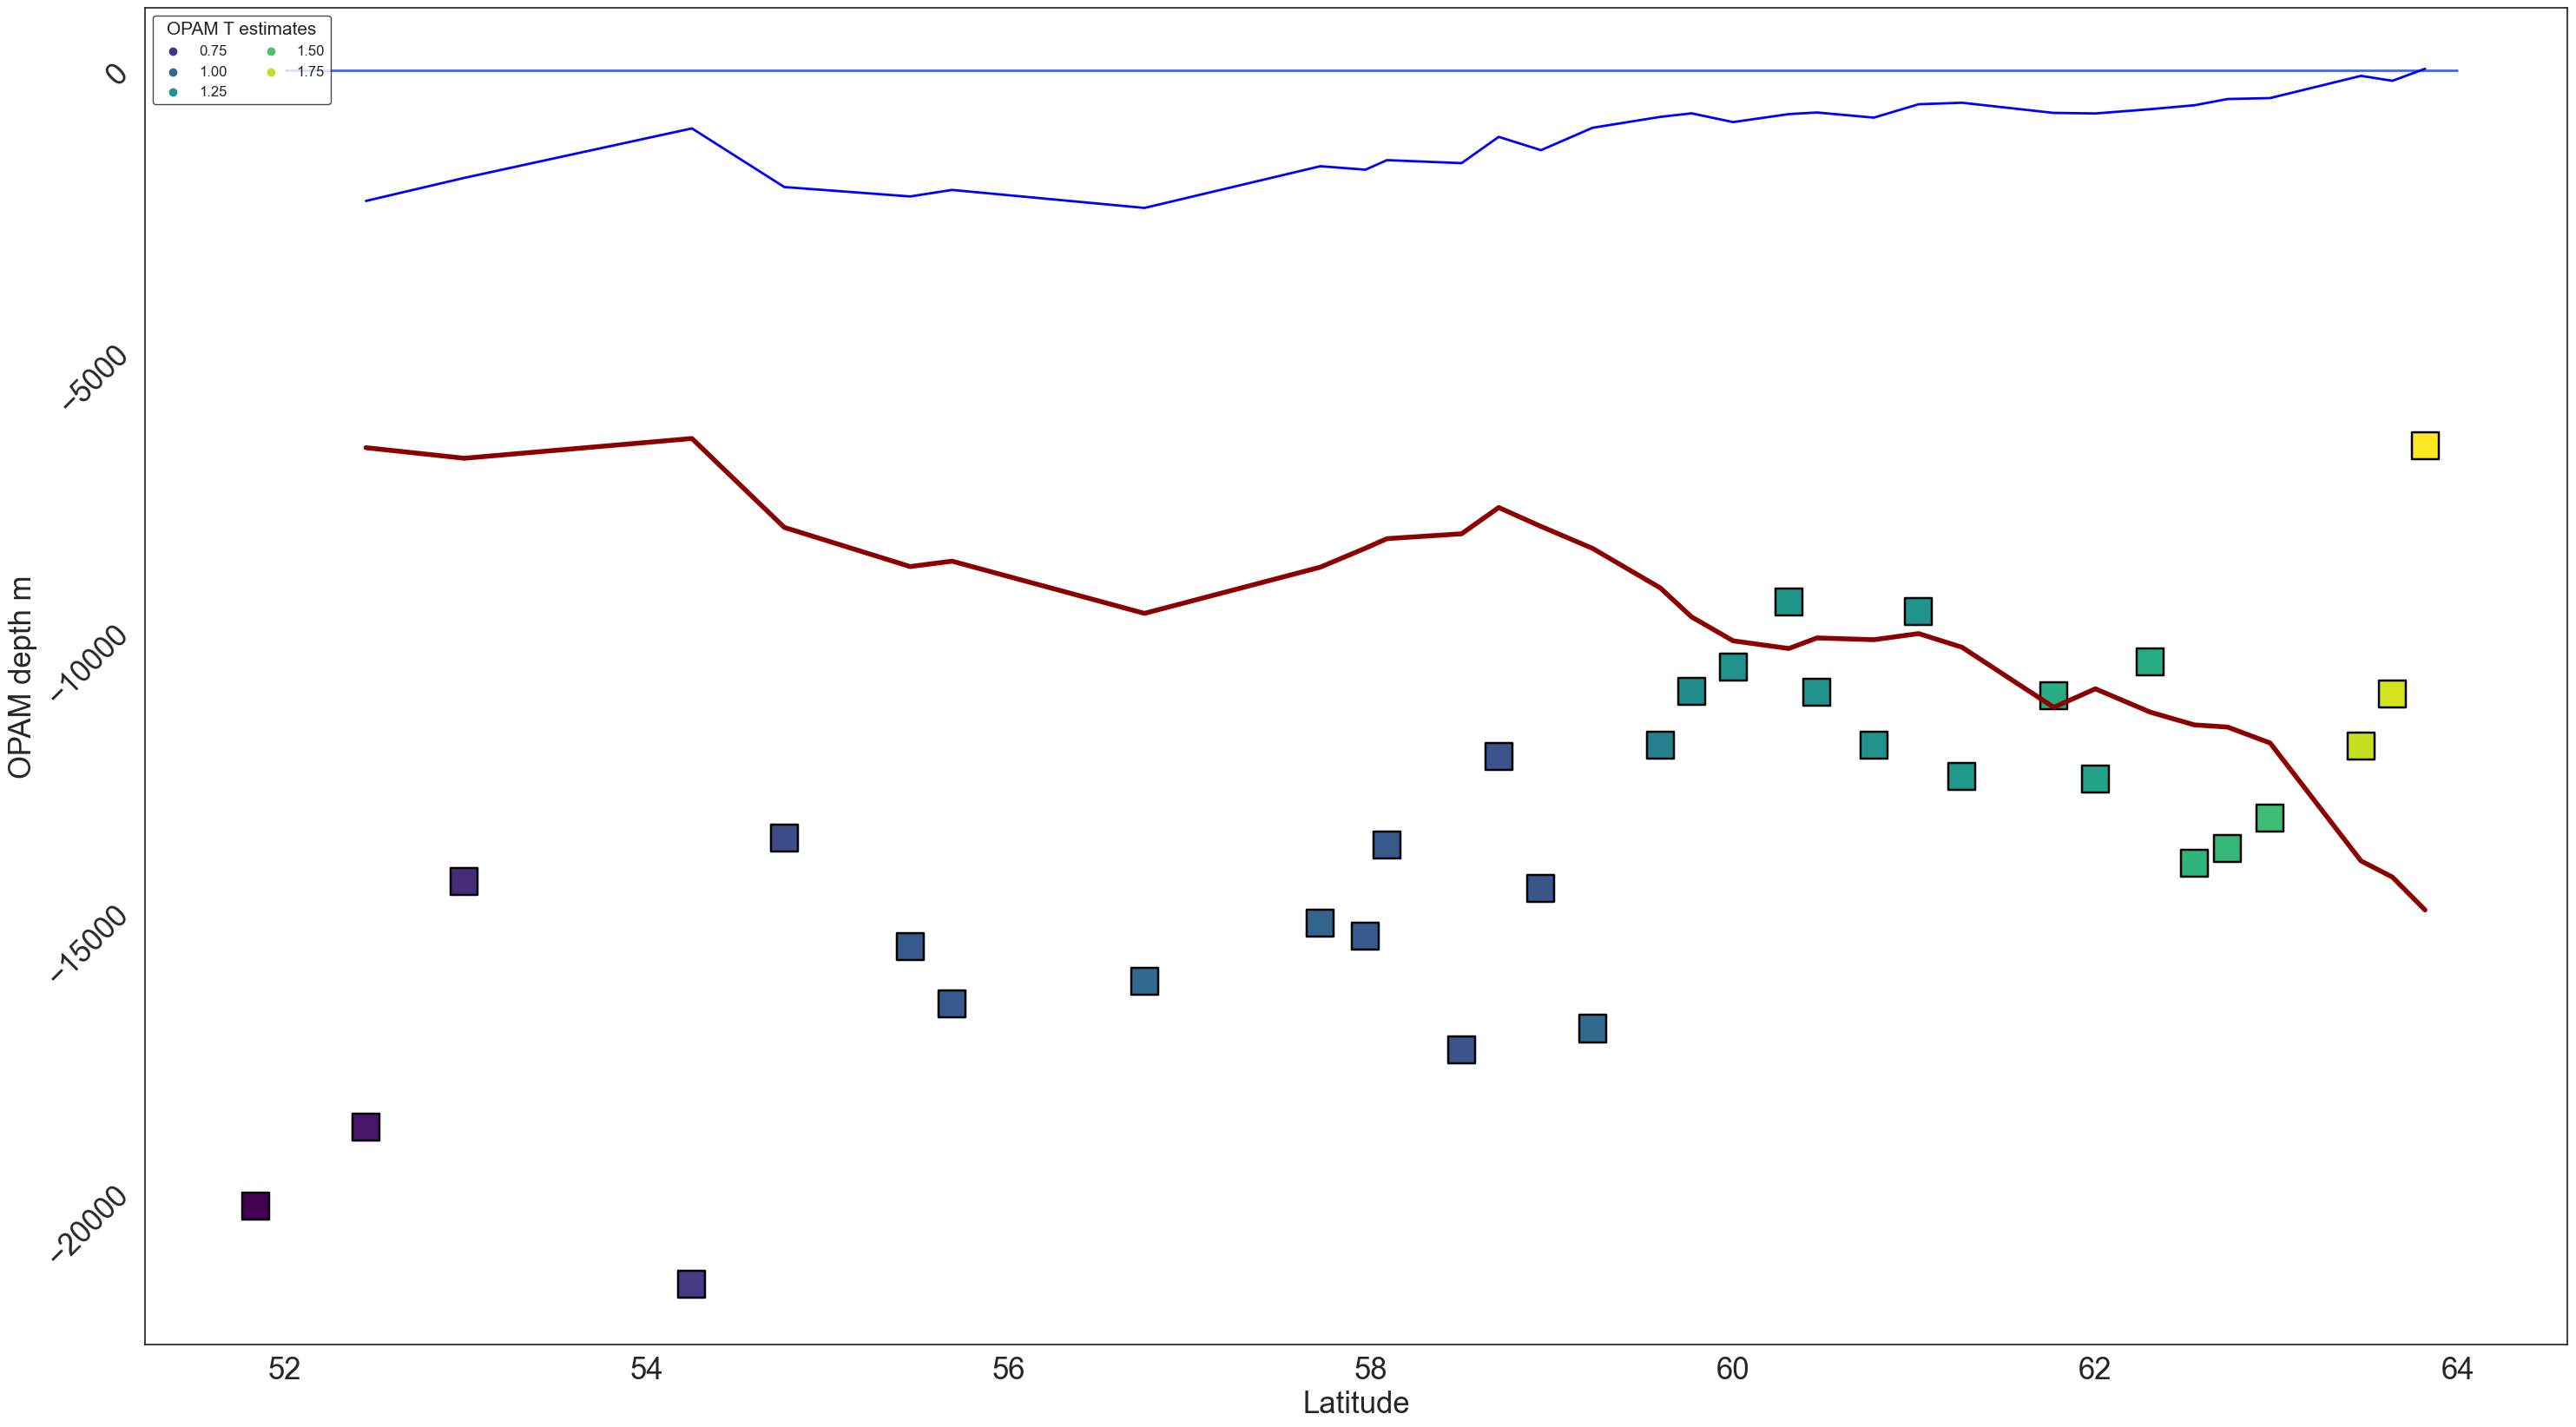

In [19]:
sns.set(rc={'figure.figsize':(36,20)})
sns.set_style("white")

plt.hlines( y = 0, color='royalblue', linewidth=2, xmin = 52, xmax = 64) 

x = bth.Latitude
y1 = bth.Elevation
y2 = y=bm.crustal_thickness*(-1000)+bth.Elevation,

#fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(6, 6))

ax.fill_between(x, y1)
ax.set_title('fill between y1 and 0')

ax = sns.lineplot(data=bth,
                  x="Latitude", 
                  y=bth.Elevation,
                  lw = 2,
                  color = "blue"
)

ax = sns.lineplot(data=bm,
                  x="Latitude", 
                  y=bm.crustal_thickness*(-1000)+bth.Elevation,
                  lw = 4,
                  markers = True,
                  color = "darkred"
)

ax = sns.scatterplot(x="Latitude", 
                     y="Depth_m",
                     data = bm,
                     color = "lightskyblue",
                     palette = 'viridis',
                     hue = "MQ",
                     edgecolor = "black",
                     s = 500,
                     marker = "s",                  
                     
)

plt.yticks(rotation=45)

ax.set_xlabel("Latitude",fontsize=25)
ax.legend(loc='center left', bbox_to_anchor=(1.5, 0.5), ncol=1)
ax.set_ylabel("OPAM depth m",fontsize=25)
ax.tick_params(labelsize=25)
ax.legend(title = "OPAM T estimates", title_fontsize = 15, fontsize = 12, edgecolor = 'k', ncol=2)

#plt.hlines( y = 0, color='royalblue', linewidth=1, xmin = 52, xmax = 64) 
ax.set(xticks=[52,54,56,58,60,62,64])

#plt.savefig("opam corrected crust", bbox_inches='tight', transparent = True, dpi = 500)
plt.show()

In [20]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)

def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

Regression Line:  y = 2.0999505047862513e-05 + -0.0β
Correlation Coef.:  -0.7368030201490561
"Goodness of Fit":  0.5428786905007703


C:\Users\Rachael\AppData\Local\Temp\ipykernel_30464\995376804.py:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm)


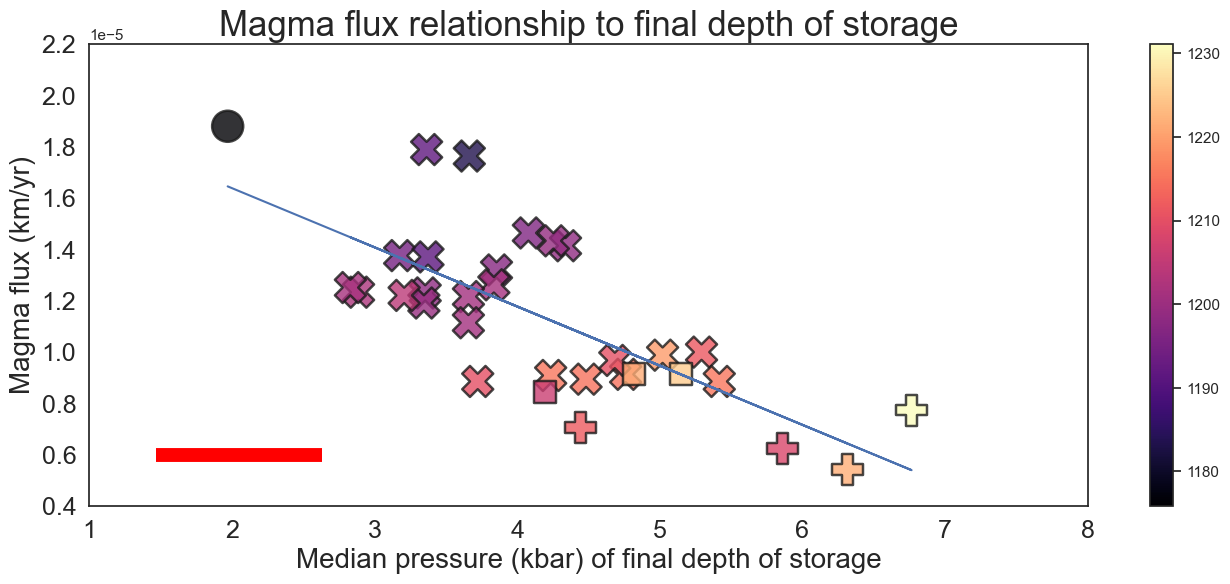

In [21]:
#plt.style.use("dark_background")
sns.set(rc={'figure.figsize':(16.1,6)})
sns.set_style("white")

x = bm['Pressure_min']
y = bm['MQ']
#plt.plot(x, y, 'o')
B0, B1, reg_line = linear_regression(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)


B0, B1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
R = corr_coef(x, y)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

ax = sns.scatterplot(x="Pressure_min", 
                     y="MQ", 
                     data=bm,
                     hue = "Temperature",
                     palette = "magma",
                     s = 500,
                     style = "Site context",
                     edgecolor = "k",
                     alpha = 0.8
)
#colour bar
norm = plt.Normalize(bm['Temperature'].min(), bm['Temperature'].max())
sm = plt.cm.ScalarMappable(cmap="magma", norm=norm)
sm.set_array([])
ax.get_legend().remove()
ax.figure.colorbar(sm)

ax.axes.set_title("Magma flux relationship to final depth of storage",fontsize=25)
plt.hlines(  y = 0.000006, color='red', linewidth=10, xmin = 1.47, xmax = 2.63) 
ax.set_xlabel("Median pressure (kbar) of final depth of storage",fontsize=20)
ax.set_ylabel("Magma flux (km/yr)",fontsize=20)
ax.tick_params(labelsize=18)
#ax.set(xticks=[1,2,3,4,5,6,7,8])
#ax.grid(axis = 'x')
plt.xlim([1,8])
plt.ylim([0.000004,0.000022])
#ax.legend(title = "Legend", title_fontsize = 15, fontsize = 12, edgecolor = 'k', ncol=1)


plt.savefig("Reykjanes Ridge Magma flux vs pressure", bbox_inches='tight', facecolor = "white", dpi=500)

plt.show()

C:\Users\Rachael\AppData\Local\Temp\ipykernel_30464\4184456786.py:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm)


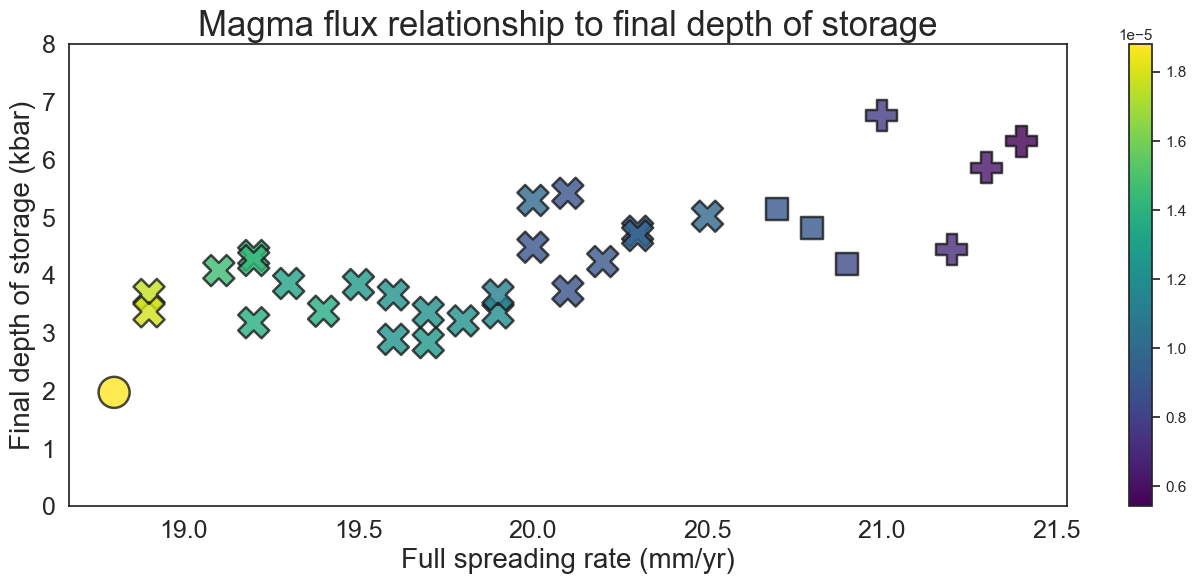

In [22]:
#depth to magma lense vs Full spreading rate

MOR = pd.read_csv('Gale2013_MOR_OPAM.csv')

#plt.style.use("dark_background")
sns.set(rc={'figure.figsize':(16.1,6)})
sns.set_style("white")


ax = sns.scatterplot(x="Full spreading rate", 
                     y="Pressure_min", 
                     data=bm,
                     hue = "MQ",
                     palette = "viridis",
                     s = 500,
                     style = "Site context",
                     edgecolor = "k",
                     alpha = 0.8
)
#colour bar
norm = plt.Normalize(bm['MQ'].min(), bm['MQ'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
ax.get_legend().remove()
ax.figure.colorbar(sm)

ax.axes.set_title("Magma flux relationship to final depth of storage",fontsize=25)
#plt.hlines(  y = 0.00001, color='red', linewidth=10, xmin = 4.47, xmax = 5.63) 
ax.set_xlabel("Full spreading rate (mm/yr)",fontsize=20)
ax.set_ylabel("Final depth of storage (kbar)",fontsize=20)
ax.tick_params(labelsize=18)
#ax.set(xticks=[1,2,3,4,5,6,7,8])
#ax.grid(axis = 'x')
#plt.xlim([0,120])
plt.ylim([0,8])
#ax.legend(title = "Legend", title_fontsize = 15, fontsize = 12, edgecolor = 'k', ncol=1)

plt.savefig("Reykjanes Ridge storage pressure vs spreading rate", bbox_inches='tight', facecolor = "white", dpi=500)

plt.show()

C:\Users\Rachael\AppData\Local\Temp\ipykernel_30464\1505073536.py:36: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm)


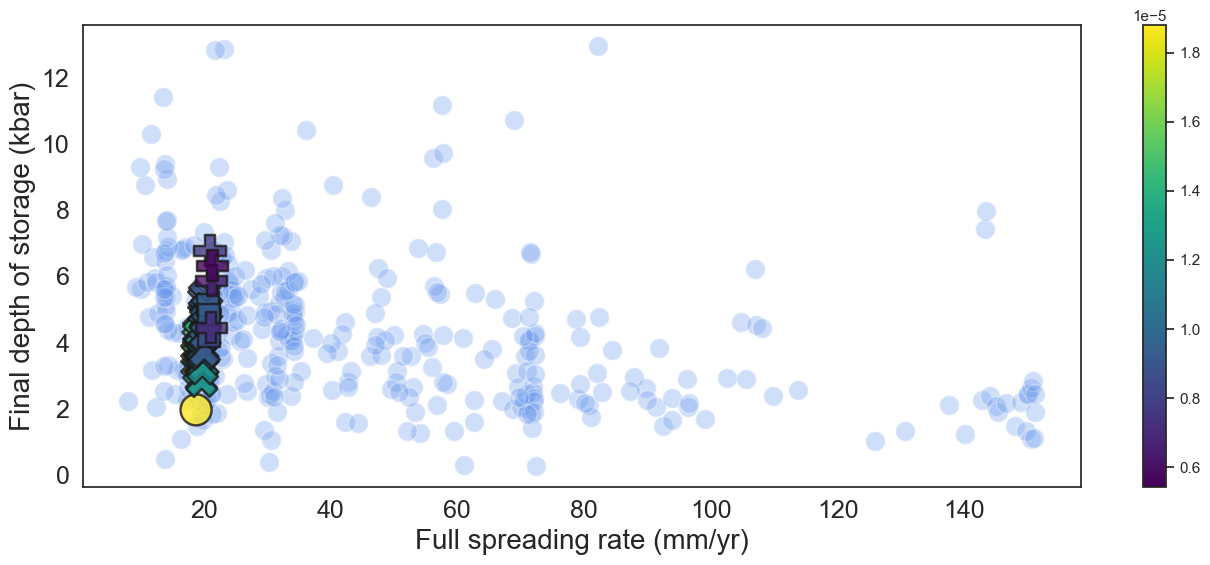

In [23]:
#depth to magma lense vs Full spreading rate

MOR = pd.read_csv('Gale2013_MOR_OPAM.csv')

#plt.style.use("dark_background")
sns.set(rc={'figure.figsize':(16.1,6)})
sns.set_style("white")


ax = sns.scatterplot(x="Spreading rate mm/y", 
                     y="Pressure_min", 
                     data=MOR,
                     color = 'cornflowerblue',
                     #palette = "mako",
                     s = 200,
                     #style = "Site context",
                     #edgecolor = "k",
                     alpha = 0.3
)

ax = sns.scatterplot(x="Full spreading rate", 
                     y="Pressure_min", 
                     data=bm,
                     hue = "MQ",
                     palette = "viridis",
                     s = 500,
                     style = "Site context",
                     edgecolor = "k",
                     alpha = 0.8
)
#colour bar
norm = plt.Normalize(bm['MQ'].min(), bm['MQ'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
ax.get_legend().remove()
ax.figure.colorbar(sm)

#ax.axes.set_title("Magma flux relationship to final depth of storage",fontsize=25)
#plt.hlines(  y = 0.00001, color='red', linewidth=10, xmin = 4.47, xmax = 5.63) 
ax.set_xlabel("Full spreading rate (mm/yr)",fontsize=20)
ax.set_ylabel("Final depth of storage (kbar)",fontsize=20)
ax.tick_params(labelsize=18)
#ax.set(xticks=[1,2,3,4,5,6,7,8])
#ax.grid(axis = 'x')
#plt.xlim([0,120])
#plt.ylim([0,800000000])
#ax.legend(title = "Legend", title_fontsize = 15, fontsize = 12, edgecolor = 'k', ncol=1)

plt.savefig("MOR segment median storage pressure vs spreading rate", bbox_inches='tight', facecolor = "white", dpi=500)

plt.show()

## CSV output file

In [24]:
#turn dataframe back to csv file

df_up.to_csv('ReykR_OPAM.csv')

#or Excel
#writer = pd.ExcelWriter('myDataFrame.xlsx')
#df.to_excel(writer, 'DataFrame')
#writer.save()